## Libraries

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from scipy.stats import pearsonr



## Data Cleaning

### Import the archive

In [40]:
co2df = pd.read_csv('CO2_emissions.csv')
co2df.head()

,country_code,country_name,year,value
0,ABW,Aruba,1960,11092.675
1,ABW,Aruba,1961,11576.719
2,ABW,Aruba,1962,12713.489
3,ABW,Aruba,1963,12178.107
4,ABW,Aruba,1964,11840.743


In [41]:
#We change the name of the column, to make it easier further on
co2df.rename(columns={'value': 'CO2_emissions_in_kt'}, inplace=True)
co2df

,country_code,country_name,year,CO2_emissions_in_kt
0,ABW,Aruba,1960,11092.675000
1,ABW,Aruba,1961,11576.719000
2,ABW,Aruba,1962,12713.489000
3,ABW,Aruba,1963,12178.107000
4,ABW,Aruba,1964,11840.743000
...,...,...,...,...
13948,ZWE,Zimbabwe,2015,12430.000305
13949,ZWE,Zimbabwe,2016,11020.000458
13950,ZWE,Zimbabwe,2017,10340.000153
13951,ZWE,Zimbabwe,2018,12380.000114


In [42]:
#This line of code helps us to see how many null values are in each column
co2df.isnull().sum()

country_code           0
country_name           0
year                   0
CO2_emissions_in_kt    0
dtype: int64

In [43]:
co2df = co2df.drop(['country_code'], axis=1)
co2df.head()

,country_name,year,CO2_emissions_in_kt
0,Aruba,1960,11092.675
1,Aruba,1961,11576.719
2,Aruba,1962,12713.489
3,Aruba,1963,12178.107
4,Aruba,1964,11840.743


In [44]:
energydf = pd.read_csv('global_renewable_energy_production.csv')
energydf

,Year,Country,SolarEnergy,WindEnergy,HydroEnergy,OtherRenewableEnergy,TotalRenewableEnergy
0,2000,USA,437.086107,1435.928598,1544.389701,319.396318,3736.800724
1,2001,USA,240.416776,402.792876,398.742141,439.779266,1481.731059
2,2002,USA,641.003511,1120.494351,334.993640,486.459433,2582.950935
3,2003,USA,849.198377,476.040844,609.102444,132.532029,2066.873694
4,2004,USA,373.818019,882.183361,1034.306532,181.053113,2471.361025
...,...,...,...,...,...,...,...
235,2019,Japan,346.649699,920.431403,1407.414660,423.383812,3097.879574
236,2020,Japan,285.779145,214.294577,532.705571,455.008389,1487.787682
237,2021,Japan,886.501070,976.637033,1320.878663,349.266504,3533.283269
238,2022,Japan,257.834151,1388.735530,1011.909892,222.412338,2880.891910


In [45]:
energydf.isnull().sum()

Year                    0
Country                 0
SolarEnergy             0
WindEnergy              0
HydroEnergy             0
OtherRenewableEnergy    0
TotalRenewableEnergy    0
dtype: int64

In [46]:
energydf = energydf.drop(['SolarEnergy', 'WindEnergy', 'HydroEnergy', 'OtherRenewableEnergy'], axis=1)
energydf.head()

,Year,Country,TotalRenewableEnergy
0,2000,USA,3736.800724
1,2001,USA,1481.731059
2,2002,USA,2582.950935
3,2003,USA,2066.873694
4,2004,USA,2471.361025


In [47]:
co2unique = co2df['country_name'].unique()

co2unique

array(['Aruba', 'Africa Eastern and Southern', 'Afghanistan',
       'Africa Western and Central', 'Angola', 'Albania', 'Andorra',
       'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas, The', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bermuda', 'Bolivia', 'Brazil', 'Barbados',
       'Brunei Darussalam', 'Bhutan', 'Botswana',
       'Central African Republic', 'Canada',
       'Central Europe and the Baltics', 'Switzerland', 'Chile', 'China',
       "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica',
       'Caribbean small states', 'Cuba', 'Curacao', 'Cayman Islands',
       'Cyprus', 'Czechia', 'Germany', 'Djibouti', 'Dominica', 'Denmark',
       'Dominican Republic', 'Algeria',
       'East Asia & Pacific (excluding

In [48]:
energyunique = energydf['Country'].unique()
energyunique

array(['USA', 'China', 'India', 'Germany', 'UK', 'France', 'Brazil',
       'Canada', 'Australia', 'Japan'], dtype=object)

In [49]:
required_country = ['Australia', 'United States', 'China', 'India', 'Germany', 'United Kingdom', 'France', 'Brazil', 'Canada', 'Japan']

co2df = co2df[co2df['country_name'].isin(required_country)]

co2df

,country_name,year,CO2_emissions_in_kt
657,Australia,1960,8.820235e+04
658,Australia,1961,9.058957e+04
659,Australia,1962,9.491296e+04
660,Australia,1963,1.010295e+05
661,Australia,1964,1.089796e+05
...,...,...,...
13264,United States,2015,4.990710e+06
13265,United States,2016,4.894500e+06
13266,United States,2017,4.819370e+06
13267,United States,2018,4.975310e+06


In [50]:
co2df['country_name'] = co2df['country_name'].replace('United States', 'USA')
co2df['country_name'] = co2df['country_name'].replace('United Kingdom', 'UK')
co2df['country_name'].unique()

array(['Australia', 'Brazil', 'Canada', 'China', 'Germany', 'France',
       'UK', 'India', 'Japan', 'USA'], dtype=object)

In [51]:
energydf

,Year,Country,TotalRenewableEnergy
0,2000,USA,3736.800724
1,2001,USA,1481.731059
2,2002,USA,2582.950935
3,2003,USA,2066.873694
4,2004,USA,2471.361025
...,...,...,...
235,2019,Japan,3097.879574
236,2020,Japan,1487.787682
237,2021,Japan,3533.283269
238,2022,Japan,2880.891910


In [52]:
energydftry = energydf

def gwh_to_co2_kt(gwh):
    return gwh * 0.699

# Apply the conversion function to the 'Energy_GWh' column
energydftry['CO2_emissions_kt'] = energydftry['TotalRenewableEnergy'].apply(gwh_to_co2_kt)

energydftry

,Year,Country,TotalRenewableEnergy,CO2_emissions_kt
0,2000,USA,3736.800724,2612.023706
1,2001,USA,1481.731059,1035.730010
2,2002,USA,2582.950935,1805.482704
3,2003,USA,2066.873694,1444.744712
4,2004,USA,2471.361025,1727.481356
...,...,...,...,...
235,2019,Japan,3097.879574,2165.417822
236,2020,Japan,1487.787682,1039.963590
237,2021,Japan,3533.283269,2469.765005
238,2022,Japan,2880.891910,2013.743445


## First analysis

<Axes: xlabel='Year', ylabel='CO2_emissions_kt'>

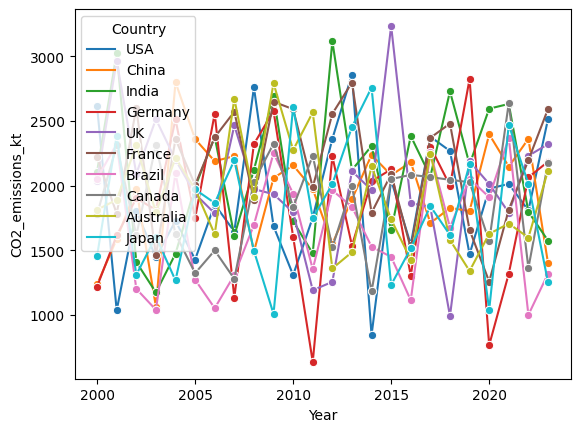

In [53]:
#plt.figure(figsize=(14, 8))
sns.lineplot(data=energydf, x='Year', y='CO2_emissions_kt', hue='Country', marker='o')

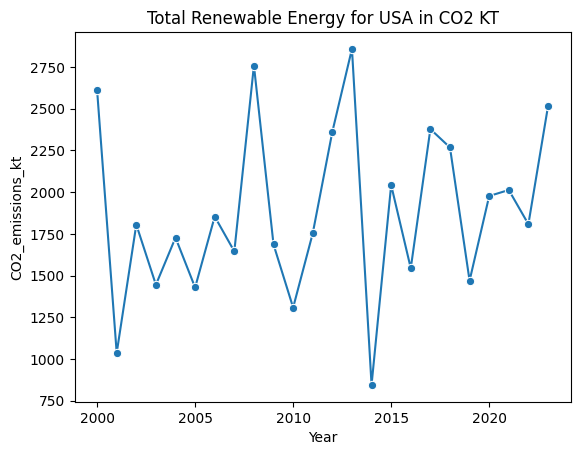

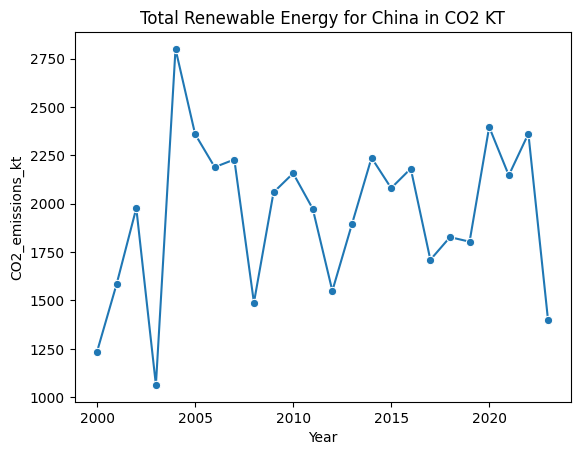

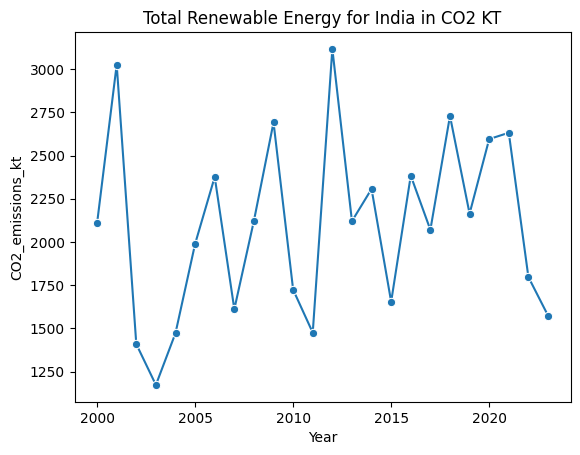

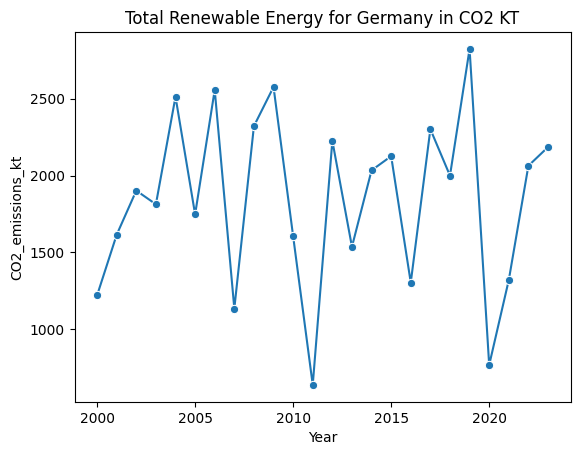

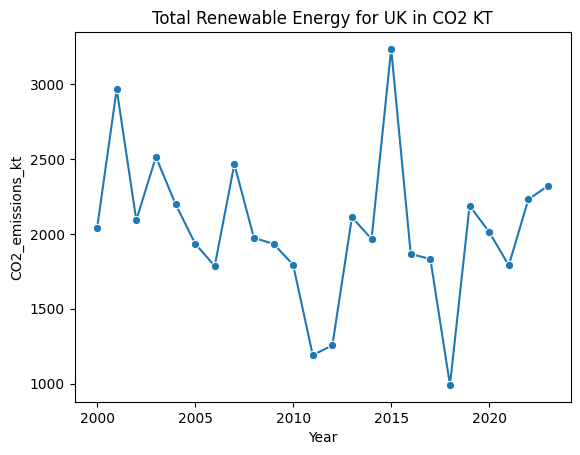

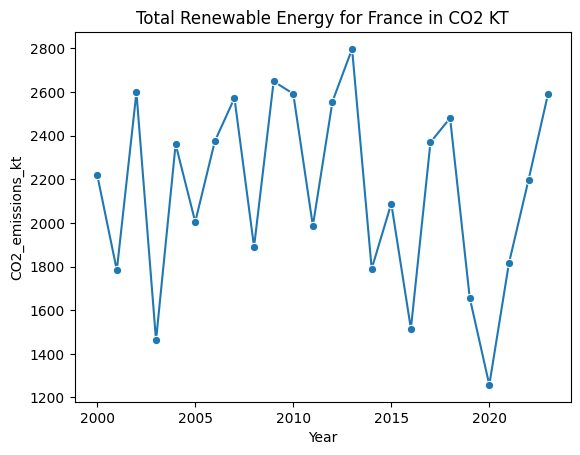

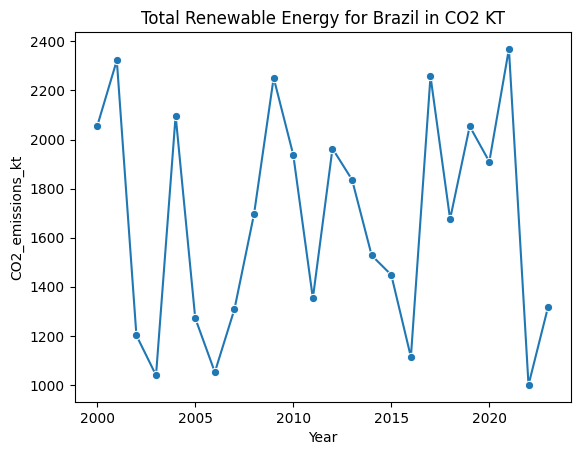

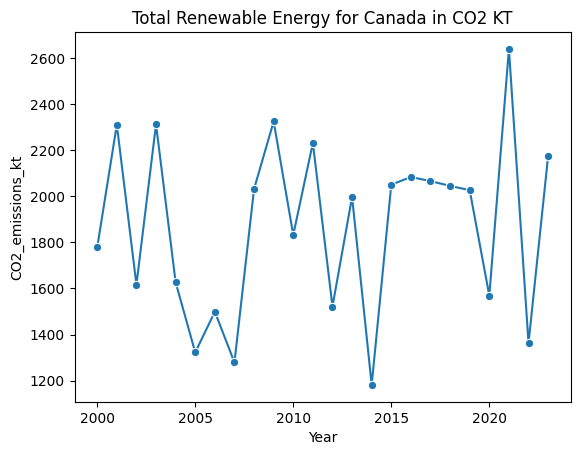

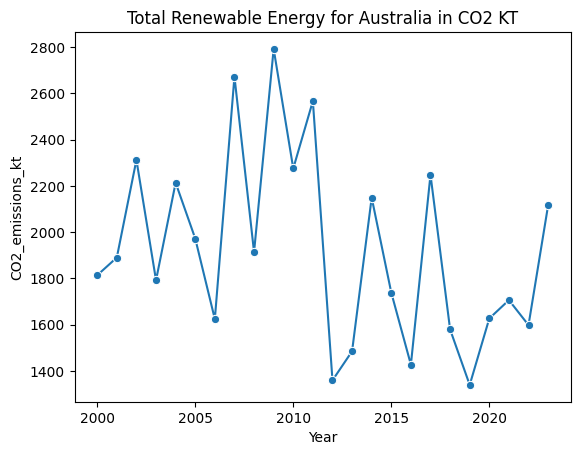

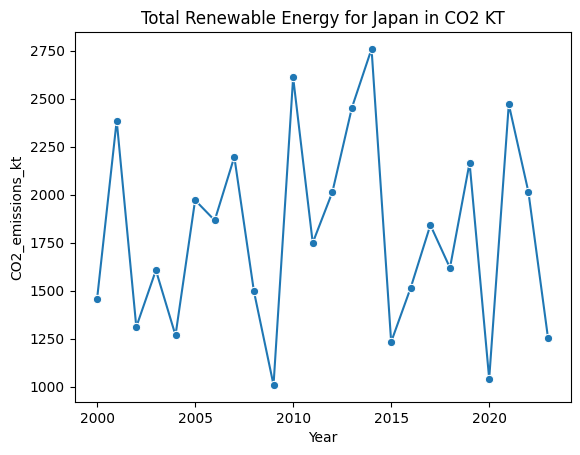

In [54]:
countries = energydf['Country'].unique()

for country in countries:
    #plt.figure(figsize=(14, 8))
    sns.lineplot(data=energydf[energydf['Country'] == country], x='Year', y='CO2_emissions_kt', marker='o')
    plt.title(f'Total Renewable Energy for {country} in CO2 KT')
    plt.show()

<Axes: xlabel='year', ylabel='CO2_emissions_in_kt'>

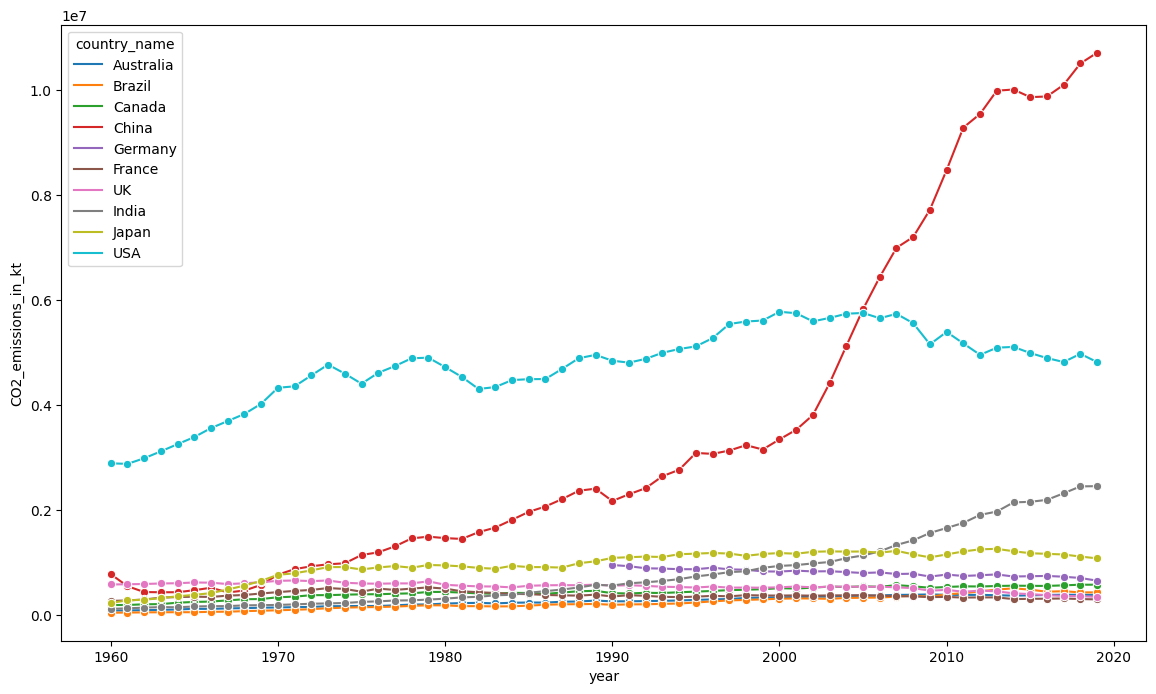

In [55]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=co2df, x='year', y='CO2_emissions_in_kt', hue='country_name', marker='o')

## First research question

Will the world be able to achive the 43% reduction that the SDG 13 says we need?

In [56]:
australia_df = co2df[co2df['country_name'] == 'Australia']
usa_df = co2df[co2df['country_name'] == 'USA']
china_df = co2df[co2df['country_name'] == 'China']
india_df = co2df[co2df['country_name'] == 'India']
germany_df = co2df[co2df['country_name'] == 'Germany']
uk_df = co2df[co2df['country_name'] == 'UK']
france_df = co2df[co2df['country_name'] == 'France']
brazil_df = co2df[co2df['country_name'] == 'Brazil']
canada_df = co2df[co2df['country_name'] == 'Canada']
japan_df = co2df[co2df['country_name'] == 'Japan']

Australia: SDG not achieved: Predicted CO2 emissions for 2030 (312470.83 kt) are higher than 43% of the 2015 emissions (215345.99 kt).
Australia: R^2 Score: 0.9941989365034577


C:\Users\pedro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


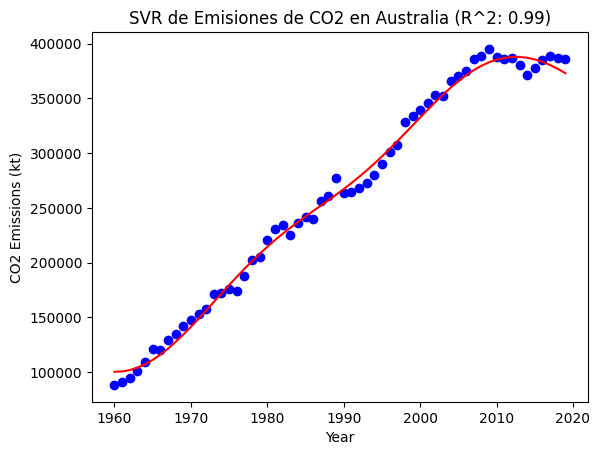

USA: SDG not achieved: Predicted CO2 emissions for 2030 (4477422.97 kt) are higher than 43% of the 2015 emissions (2844704.68 kt).
USA: R^2 Score: 0.9662282955011735


C:\Users\pedro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


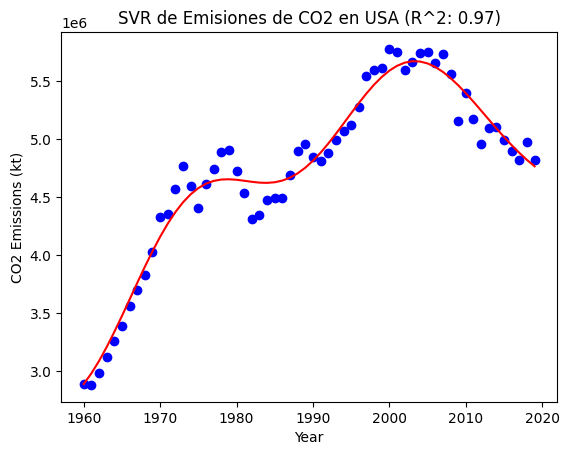

C:\Users\pedro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


China: SDG not achieved: Predicted CO2 emissions for 2030 (7767014.31 kt) are higher than 43% of the 2015 emissions (5620826.78 kt).
China: R^2 Score: 0.9935263262803726


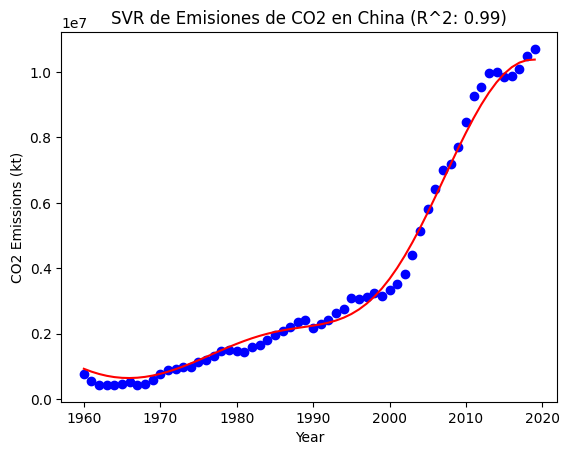

C:\Users\pedro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


India: SDG not achieved: Predicted CO2 emissions for 2030 (1995805.76 kt) are higher than 43% of the 2015 emissions (1230071.41 kt).
India: R^2 Score: 0.9939010300194028


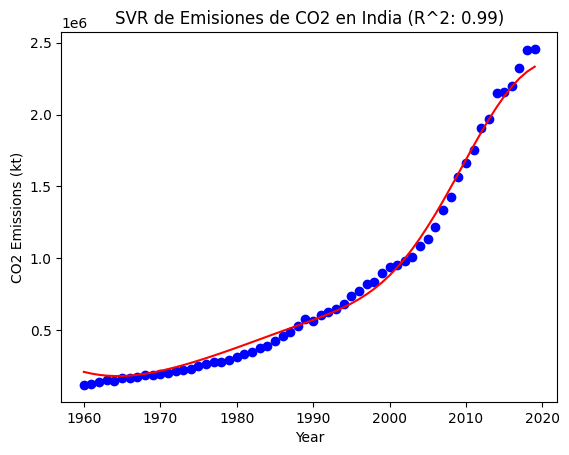

C:\Users\pedro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Germany: SDG not achieved: Predicted CO2 emissions for 2030 (795761.12 kt) are higher than 43% of the 2015 emissions (423116.70 kt).
Germany: R^2 Score: 0.9018212610050349


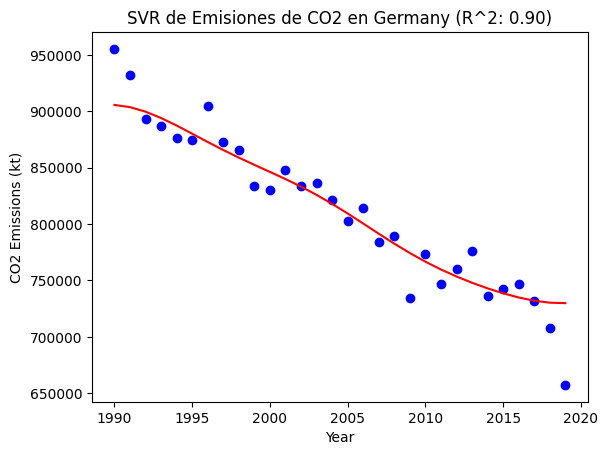

C:\Users\pedro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


UK: SDG not achieved: Predicted CO2 emissions for 2030 (377671.91 kt) are higher than 43% of the 2015 emissions (228615.59 kt).
UK: R^2 Score: 0.9304602567469157


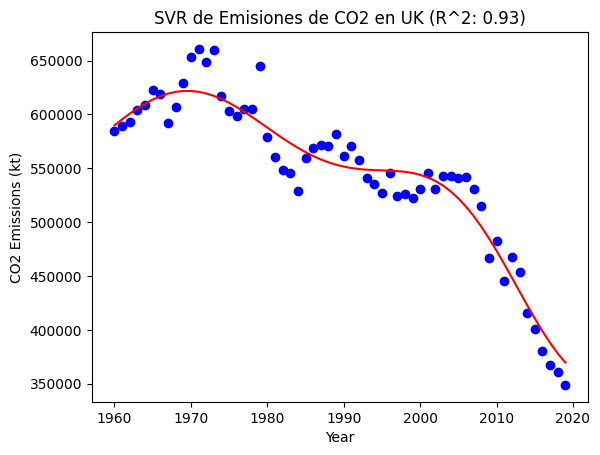

France: SDG not achieved: Predicted CO2 emissions for 2030 (311326.67 kt) are higher than 43% of the 2015 emissions (177440.99 kt).
France: R^2 Score: 0.9107181319950544


C:\Users\pedro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


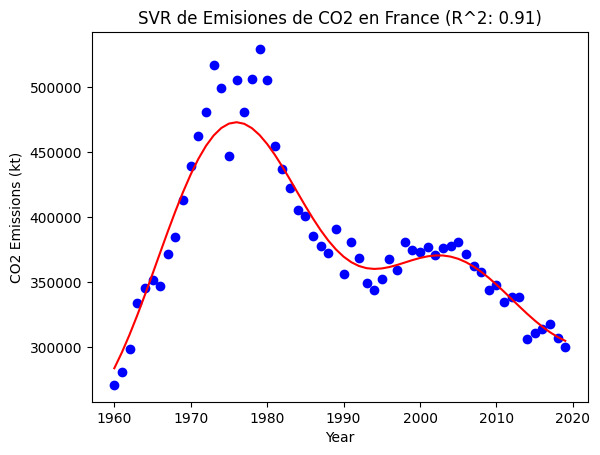

C:\Users\pedro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Brazil: SDG not achieved: Predicted CO2 emissions for 2030 (357578.43 kt) are higher than 43% of the 2015 emissions (276643.80 kt).
Brazil: R^2 Score: 0.9781848568095923


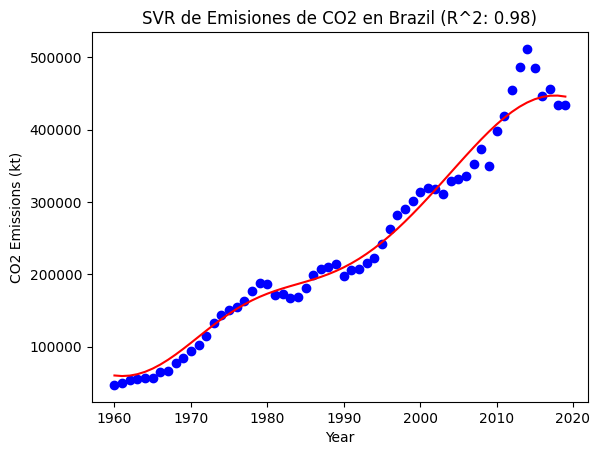

C:\Users\pedro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Canada: SDG not achieved: Predicted CO2 emissions for 2030 (505016.41 kt) are higher than 43% of the 2015 emissions (318459.01 kt).
Canada: R^2 Score: 0.9825681585585758


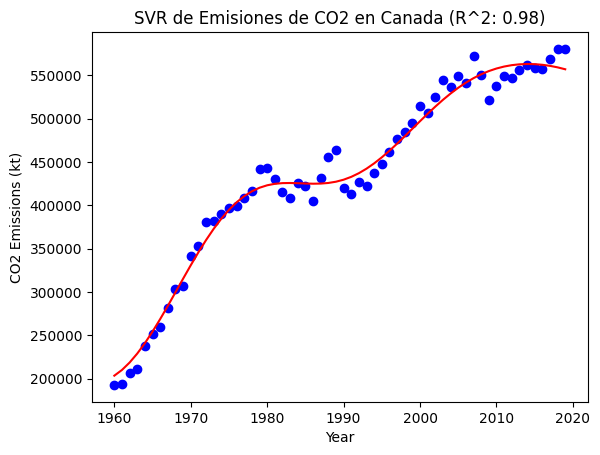

Japan: SDG not achieved: Predicted CO2 emissions for 2030 (950928.89 kt) are higher than 43% of the 2015 emissions (672280.77 kt).
Japan: R^2 Score: 0.9700923621232134


C:\Users\pedro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


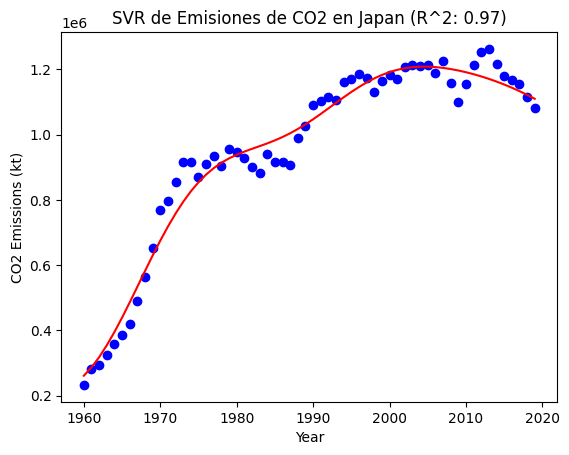

In [57]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# List of datasets and their corresponding country names
datasets = [
    ('Australia', australia_df),
    ('USA', usa_df),
    ('China', china_df),
    ('India', india_df),
    ('Germany', germany_df),
    ('UK', uk_df),
    ('France', france_df),
    ('Brazil', brazil_df),
    ('Canada', canada_df),
    ('Japan', japan_df)
]

# Loop through each dataset
for country_name, df in datasets:
    # Normalizar los datos
    sc_X = StandardScaler()
    sc_y = StandardScaler()

    X_scaled = sc_X.fit_transform(df[['year']])
    y_scaled = sc_y.fit_transform(df['CO2_emissions_in_kt'].values.reshape(-1, 1)).flatten()

    # Crear y entrenar el modelo SVR
    model = SVR(kernel='rbf')  # kernel='rbf' es para regresión no lineal
    model.fit(X_scaled, y_scaled)

    # Predecir las emisiones para el año 2030
    year_2030_scaled = sc_X.transform([[2030]])
    predicted_emissions_2030_svr = model.predict(year_2030_scaled)
    predicted_emissions_2030_svr = sc_y.inverse_transform(predicted_emissions_2030_svr.reshape(-1, 1))

    # Predecir en todo el conjunto de datos para calcular R^2
    y_pred_scaled = model.predict(X_scaled)
    y_pred = sc_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

    # Calcular R^2
    r2 = r2_score(df['CO2_emissions_in_kt'], y_pred)

    # Comparar la predicción de 2030 con el 43% de las emisiones de 2015
    emissions_2015 = df.loc[df['year'] == 2015, 'CO2_emissions_in_kt'].values[0]
    target_emissions_2030 = emissions_2015 * 0.57  # 43% de reducción significa 57% del valor original

    if predicted_emissions_2030_svr[0][0] < target_emissions_2030:
        print(f"{country_name}: SDG achieved: Predicted CO2 emissions for 2030 ({predicted_emissions_2030_svr[0][0]:.2f} kt) are lower than 43% of the 2015 emissions ({target_emissions_2030:.2f} kt).")
    else:
        print(f"{country_name}: SDG not achieved: Predicted CO2 emissions for 2030 ({predicted_emissions_2030_svr[0][0]:.2f} kt) are higher than 43% of the 2015 emissions ({target_emissions_2030:.2f} kt).")

    print(f"{country_name}: R^2 Score: {r2}")

    # Visualización
    plt.scatter(df['year'], df['CO2_emissions_in_kt'], color='blue')
    plt.plot(df['year'], y_pred, color='red')
    plt.title(f'SVR de Emisiones de CO2 en {country_name} (R^2: {r2:.2f})')
    plt.xlabel('Year')
    plt.ylabel('CO2 Emissions (kt)')
    plt.show()


## Second research question

Are countries with higher renewable energy production showing a more significant decrease in CO2 emissions over time compared to countries with lower renewable energy production?


In [58]:
merged_df = pd.merge(energydftry, co2df, how='inner', left_on=['Year', 'Country'], right_on=['year', 'country_name'])


In [59]:
merged_df = merged_df.drop(columns=['year', 'country_name'])
merged_df

,Year,Country,TotalRenewableEnergy,CO2_emissions_kt,CO2_emissions_in_kt
0,2000,USA,3736.800724,2612.023706,5.775810e+06
1,2001,USA,1481.731059,1035.730010,5.748260e+06
2,2002,USA,2582.950935,1805.482704,5.593030e+06
3,2003,USA,2066.873694,1444.744712,5.658990e+06
4,2004,USA,2471.361025,1727.481356,5.738290e+06
...,...,...,...,...,...
195,2015,Japan,1762.389162,1231.910025,1.179440e+06
196,2016,Japan,2168.008321,1515.437817,1.167790e+06
197,2017,Japan,2633.752283,1840.992845,1.155230e+06
198,2018,Japan,2314.749312,1618.009769,1.116150e+06


In [60]:
merged_df['CO2_normalized'] = merged_df.groupby('Country')['CO2_emissions_in_kt'].transform(lambda x: x / x.max())
merged_df['RenewableEnergy_normalized'] = merged_df.groupby('Country')['TotalRenewableEnergy'].transform(lambda x: x / x.max())

In [61]:
country_correlations = merged_df.groupby('Country').apply(lambda x: pearsonr(x['RenewableEnergy_normalized'], x['CO2_normalized'])[0]).reset_index()
country_correlations.columns = ['Country', 'Correlation_CO2_Renewable']

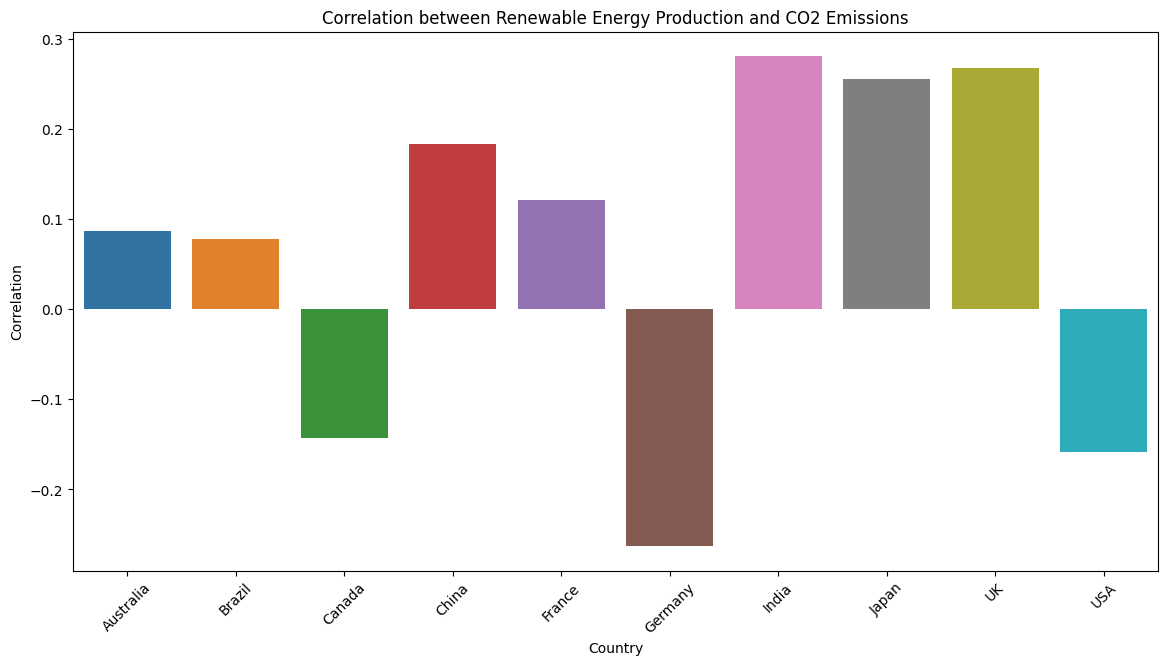

In [62]:
plt.figure(figsize=(14, 7))
sns.barplot(x='Country', y='Correlation_CO2_Renewable', data=country_correlations)
plt.xticks(rotation=45)
plt.title('Correlation between Renewable Energy Production and CO2 Emissions')
plt.ylabel('Correlation')
plt.xlabel('Country')
plt.show()

## Third research question

How has the production of renewable energy evolved over the years, and what correlation, if any, can be observed between these trends and global CO2 emissions?


In [63]:
global_trends = merged_df.groupby('Year').agg({
    'TotalRenewableEnergy': 'sum',
    'CO2_emissions_in_kt': 'sum'
}).reset_index()

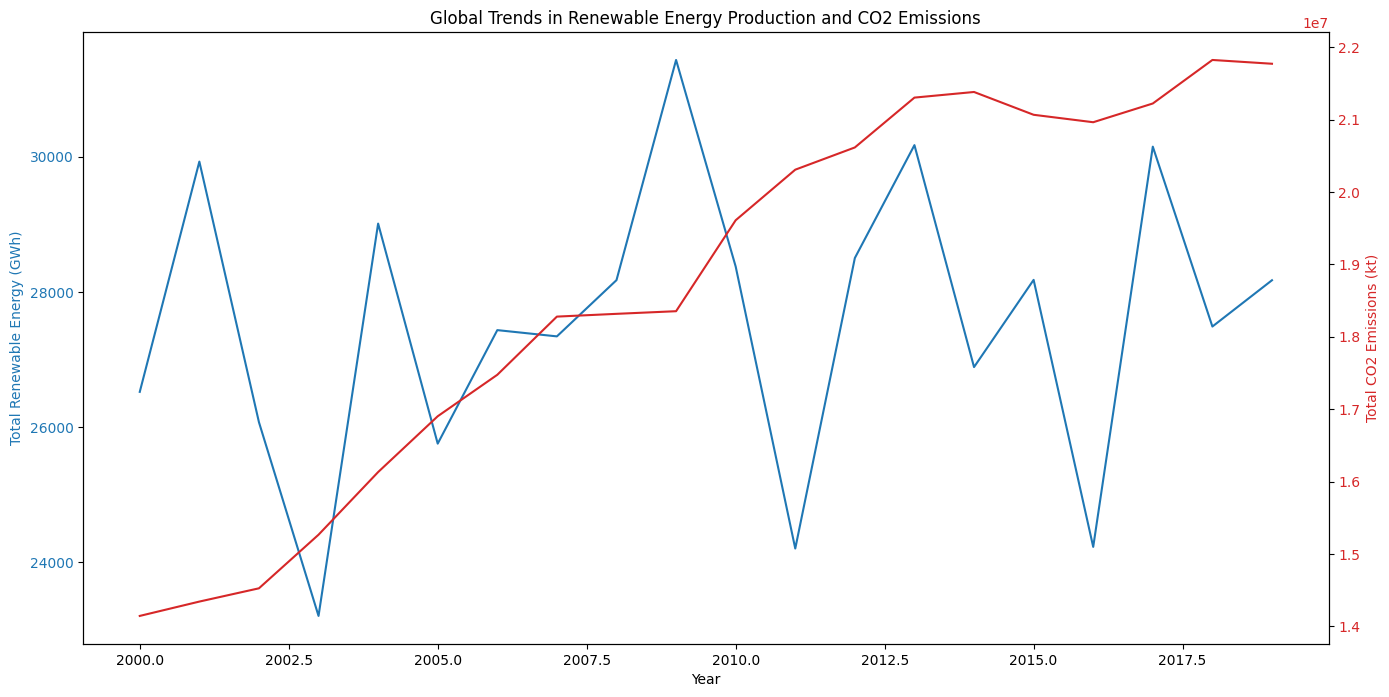

In [64]:

# Plot the trends over time
fig, ax1 = plt.subplots(figsize=(14, 7))

ax1.set_xlabel('Year')
ax1.set_ylabel('Total Renewable Energy (GWh)', color='tab:blue')
ax1.plot(global_trends['Year'], global_trends['TotalRenewableEnergy'], color='tab:blue', label='Total Renewable Energy')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Total CO2 Emissions (kt)', color='tab:red')  # We already handled the x-label with ax1
ax2.plot(global_trends['Year'], global_trends['CO2_emissions_in_kt'], color='tab:red', label='Total CO2 Emissions')
ax2.tick_params(axis='y', labelcolor='tab:red')

fig.tight_layout()  # Otherwise, the right y-label is slightly clipped
plt.title('Global Trends in Renewable Energy Production and CO2 Emissions')
plt.show()

In [65]:
global_correlation, _ = pearsonr(global_trends['TotalRenewableEnergy'], global_trends['CO2_emissions_in_kt'])
print(f'Global correlation between Renewable Energy Production and CO2 Emissions: {global_correlation:.4f}')

Global correlation between Renewable Energy Production and CO2 Emissions: 0.1640
